<a href="https://colab.research.google.com/github/jiyeon712/B.D.A/blob/main/%ED%95%84%EC%88%981_%ED%95%9C%EC%A7%80%EC%97%B087_0121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 필요한 패키지 설치

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

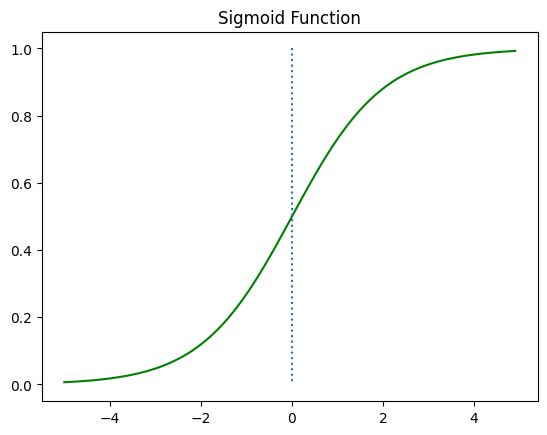

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

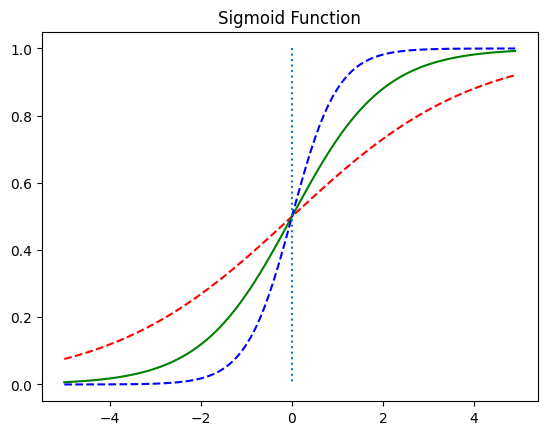

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

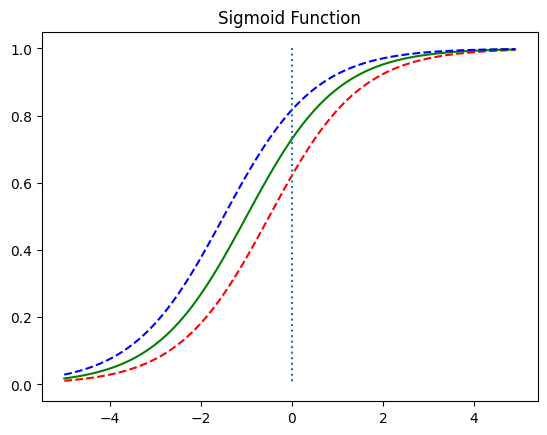

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart_2020_cleaned.csv'

In [ ]:
df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## 사용할 컬럼을 정리하자.
df2 = pd.get_dummies(df, columns =['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
                    , drop_first = True)
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,False,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,20.34,0.0,0.0,7.0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,8.0,False,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,24.21,0.0,0.0,6.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,23.71,28.0,0.0,8.0,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
df2 =df2 * 1

In [ ]:
df2

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# 숫자형 변수 분리

df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

In [ ]:
#Robust Scaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num) # 스케일링 진행

In [ ]:
# 컬럼명 추가

df_num2 = pd.DataFrame(data =df_robust, columns = df_num.columns)

In [ ]:
df_num2

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.453315,1.5,10.0,-1.0
1,-0.947226,0.0,0.0,0.0
2,-0.102842,10.0,10.0,0.5
3,-0.423545,0.0,0.0,-0.5
4,-0.491204,14.0,0.0,0.5
...,...,...,...,...
319790,0.009472,3.5,0.0,-0.5
319791,0.338295,0.0,0.0,-1.0
319792,-0.419486,0.0,0.0,-0.5
319793,0.740189,0.0,0.0,2.5


In [ ]:
df3 = pd.concat([df_num2, df_nom], axis= 1) # 스케일링한 컬럼을 다시 합치기!

In [ ]:
X

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,1,0,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0.009472,3.5,0.0,-0.5,1,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
319791,0.338295,0.0,0.0,-1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
319792,-0.419486,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,0.740189,0.0,0.0,2.5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# 독립변수와 종속변수 분리 생성

X = df3.drop(['HeartDisease_Yes'],axis =1 )
y = df3[['HeartDisease_Yes']] # 로지스틱회귀를 사용하기 위해 2진분류로 진행

In [ ]:
# train,test 분리


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [ ]:
print(len(X_train), 'train 개수')
print(len(X_test), 'test 개수')

223856 train 개수
95939 test 개수


### 심장병의 경우 대부분 정상적인 사람들은 없는 경우가 많다 0 인 경우가 많다.
- 1인 경우는 상대적으로 적다
- 결국 y값에 대한 불균형이라는 것
- 해결 하기위해서 우리가 간단하게 오버샘플링 또는 언더샘플링 등을 진행하는 것!

<Axes: xlabel='HeartDisease_Yes', ylabel='count'>

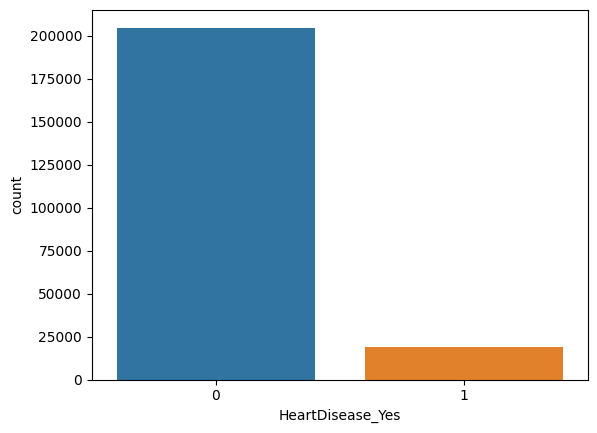

In [ ]:
sns.countplot(x='HeartDisease_Yes',data=y_train) # 대부분의 값들이 0의 경우가 많은 케이스

### 클래스가 불균형일 때 진행하게 된다면?

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('학습셋 모델 정확도', model.score(X_train, y_train))

학습셋 모델 정확도 0.9159727682081338


In [ ]:
print('테스트의 정확도는?', model.score(X_test, y_test))

테스트의 정확도는? 0.9158215115854866


### Crossvalidation 등을 하게 되면 분명 불균형으로 인해서 정확도가 다르게 나올 것이며 문제가 발생할 수 있다.
### 과연 이 정확도가 맞는 것일까?

### 언더샘플링을 진행해서 다시 학습해 보자!

In [ ]:
X_train.columns

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
221542,-0.009472,5.0,0.000000,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
144018,-0.202977,0.0,0.000000,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
154685,-0.715832,0.0,0.000000,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
96022,-0.342355,0.0,0.000000,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
256866,-0.602165,15.0,0.000000,-0.5,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,-0.703654,0.0,0.000000,0.5,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
102486,0.542625,3.5,3.333333,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
135892,-0.488498,0.0,0.000000,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10196,-0.202977,0.0,0.000000,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
# 임시 변수명 적용

X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']


X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
221542,-0.009472,5.0,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
144018,-0.202977,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
154685,-0.715832,0.0,0.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
96022,-0.342355,0.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
256866,-0.602165,15.0,0.0,-0.5,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=111).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (223856, 37) (223856, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (38364, 37) (38364, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 y1
0    204674
1     19182
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 y1
0    19182
1    19182
Name: count, dtype: int64


In [ ]:
# 컬럼명 복구
# 이 부분을 복구하지 않아 에러 확인
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
186146,-0.215156,0.0,0.0,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
193539,-0.612991,0.0,1.0,-0.5,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
119047,-0.680650,0.0,0.0,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
247250,3.012179,0.0,10.0,0.5,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
259418,0.538566,1.5,0.0,0.5,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
# 언더샘플링 학습셋 모델 학습

model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.764101762068606


/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 언더샘플링 테스트셋 모델 적합

print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.7525927933374331


- 0을 잘 예측했다고 보면 정확도 자체도 높게 나올 수 있는 것, 실제로는 1에 대한 예측이 중요한 것
- 불균형일 때 이런 식으로 클래스에 대해서 맞추지 않으면 잘못된 결과로 좋은 성능이라고 오해할 수 있다.

In [ ]:
# 계수 값을 확인하기!
model.coef_

array([[ 6.22143386e-02,  6.06878634e-03,  1.39183518e-02,
        -3.37900231e-02,  3.78596376e-01, -2.22211470e-01,
         1.08870683e+00,  2.16959170e-01,  7.10086045e-01,
        -1.13897429e+00, -1.90435700e-01,  4.38865757e-02,
         2.73002336e-01,  5.43002487e-01,  9.86382167e-01,
         1.19035930e+00,  1.47002057e+00,  1.70181572e+00,
         1.99669541e+00,  2.18947355e+00,  2.47235727e+00,
        -4.03355165e-01, -1.59039039e-01, -9.38229219e-02,
         8.74774248e-02,  6.09192927e-02,  1.27303738e-01,
         4.87323691e-01,  4.11172897e-01,  3.50634899e-04,
         1.54244390e+00,  1.06344779e+00,  1.87943440e+00,
         4.84335135e-01,  2.94949444e-01,  5.61792966e-01,
         8.73201412e-02]])

In [ ]:
model_un.coef_

array([[ 0.05898114,  0.01468331,  0.0145515 , -0.06954679,  0.39480142,
        -0.17695879,  1.17379958,  0.30740856,  0.77480132, -0.18371743,
         0.179571  ,  0.23668017,  0.54036504,  0.95229763,  1.32227992,
         1.54961191,  1.83590457,  2.08420387,  2.43265282,  2.59269336,
         2.96918261, -0.56702369, -0.27675207, -0.23386284, -0.05715589,
        -0.15730343,  0.11960768,  0.5805745 ,  0.82478925, -0.03085005,
         1.47914513,  1.00811689,  1.70358723,  0.44515963,  0.362047  ,
         0.60988943,  0.13760823]])

In [ ]:
# 로지스틱 모델 다른 버전으로 확인

model2 = sm.Logit(y_train, X_train)
results = model2.fit(mehtod='newton') #

results.summary()
#확률의 개념으로 접근하여 +,- 부호를 확인하고 살펴볼 수 있다.

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: mehtod. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.239496
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:               223856
Model:                          Logit   Df Residuals:                   223819
Method:                           MLE   Df Model:                           36
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                  0.1811
Time:                        20:50:12   Log-Likelihood:                -53613.
converged:                       True   LL-Null:                       -65466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0855      0.010      8.739      0.000       0.066       0.105
PhysicalHealth                       0.0061      0.002      2.938      0.003       0.002       0.010
MentalHealth                        -0.0111      0.003     -3.498      0.000      -0.017      -0.005
SleepTime                           -0.0807      0.010     -7.889      0.000      -0.101      -0.061
Smoking_Yes                          0.3107      0.017     18.373      0.000       0.278       0.344
AlcoholDrinking_Yes                 -0.3082      0.040     -7.774      0.000      -0.386      -0.231
Stroke_Yes                           1.0917      0.027     40.131      0.000       1.038       1.145
DiffWalking_Yes                      0.1649      0.022      7.537      0.000       0.122       0.208
Sex_Male                             0.5102      0.017     30.629      0.000       0.478       0.543
AgeCategory_25-29                   -2.6947      0.107    -25.295      0.000      -2.903      -2.486
AgeCategory_30-34                   -2.3248      0.084    -27.827      0.000      -2.489      -2.161
AgeCategory_35-39                   -2.2322      0.075    -29.809      0.000      -2.379      -2.085
AgeCategory_40-44                   -1.9147      0.064    -29.973      0.000      -2.040      -1.789
AgeCategory_45-49                   -1.4753      0.053    -27.908      0.000      -1.579      -1.372
AgeCategory_50-54                   -1.1132      0.045    -24.984      0.000      -1.201      -1.026
AgeCategory_55-59                   -0.8241      0.040    -20.792      0.000      -0.902      -0.746
AgeCategory_60-64                   -0.5456      0.037    -14.763      0.000      -0.618      -0.473
AgeCategory_65-69                   -0.3056      0.036     -8.493      0.000      -0.376      -0.235
AgeCategory_70-74                    0.0103      0.036      0.287      0.774      -0.060       0.080
AgeCategory_75-79                    0.1811      0.038      4.818      0.000       0.107       0.255
AgeCategory_80 or older              0.4382      0.036     12.038      0.000       0.367       0.510
Race_Asian                          -3.0360      0.081    -37.634      0.000      -3.194      -2.878
Race_Black                          -2.7452      0.043    -63.496      0.000      -2.830      -2.660
Race_Hispanic                       -2.7873      0.044    -64.018      0.000      -2.873      -2.702
Race_Other                          -2.5132      0.053    -47.017      0.000      -2.618      -2.408
Race_White                          -2.4765      0.031    -80.783      0.000      -2.537      -2.416
Diabetic_No, borderline diabetes     0.0991      0.051      1.938      0.053      -0.001       0.199
Diabetic_Yes                         0.5054      0.020     25.118      0.000       0.466       0.545
Diabetic_Yes (during pregnancy)      0.0283      0.124      0.229      0.819      -0.215       0.271
PhysicalA

In [ ]:
# 오즈비들도 확인할 수 있음
np.exp(results.params)

BMI                                 1.089238
PhysicalHealth                      1.006132
MentalHealth                        0.988969
SleepTime                           0.922428
Smoking_Yes                         1.364361
AlcoholDrinking_Yes                 0.734746
Stroke_Yes                          2.979188
DiffWalking_Yes                     1.179272
Sex_Male                            1.665668
AgeCategory_25-29                   0.067566
AgeCategory_30-34                   0.097805
AgeCategory_35-39                   0.107288
AgeCategory_40-44                   0.147386
AgeCategory_45-49                   0.228712
AgeCategory_50-54                   0.328497
AgeCategory_55-59                   0.438609
AgeCategory_60-64                   0.579475
AgeCategory_65-69                   0.736717
AgeCategory_70-74                   1.010310
AgeCategory_75-79                   1.198579
AgeCategory_80 or older             1.549890
Race_Asian                          0.048028
Race_Black

## 필수과제1. 교차검증을 진행해서 클래스 불균형시 발생하는 문제를 확인해 보기!

## 필수과제2. 정확도아니라 f1스코어를 비교해서 클래스가 불균형이지 않은 경우, undersampling 했을 때 두 가지 같이 비교해서 정리!